<a href="https://colab.research.google.com/github/andreosokil/andreosokil/blob/main/Data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Agenda for the workshop:

*   Introduction to Python
  - Colab, data analysis libraries and other tools
  - Cleaning data basics
  - Exploratory analysis
  - Practice cases with payment and product data
*   Visualisation with Python
  - Basic metrics
  - Practice cases with payment and product data
*   Statistics
  - A/B testing with Python
  - Distributions and statistical tests
  - Shap values
*   Cohort analysis and LTV
  - Transformation of data, joins and merges
  - Calculating retention
  - Modeling business metrics


# Data exploration


In [ ]:
# 📥 Load Libraries and Dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Upload the dataset to Colab or use local path if running locally
sheet_id = "1xXFF0XZ6c6GemBTq7n5dIn6W6dC5k6bdaUbrWAD6P2Q"
sheet_name = "ecommerce_payment_data"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
df = pd.read_csv(url)

# Define start and end date
start_date = datetime(2023, 1, 1)
end_date = datetime(2025, 6, 25)

# Generate random number of days between the dates
n = len(df)  # number of rows
random_days = np.random.randint(0, (end_date - start_date).days, size=n)

# Create order_date column
df['order_date'] = [start_date + timedelta(days=int(d)) for d in random_days]

# Preview result
print(df[['order_id', 'order_date']].head())

  order_id order_date
0  order_1 2024-02-18
1  order_2 2023-10-11
2  order_3 2025-01-18
3  order_4 2024-03-31
4  order_5 2023-11-01


## 1. Data Understanding

In [ ]:
df.sort_values("days_to_deliver", ascending=False)

,user_id,order_id,device,country,gender,price,discount,transaction_status,delivery_status,payment_method,days_to_deliver,category,order_date
1742,user_1164,order_1743,Tablet,Brazil,Female,91.89,13.52,Success,In Transit,Apple Pay,11,Books,2023-06-07
1204,user_1803,order_1205,Mobile,UK,Male,105.98,7.65,Success,Delivered,Apple Pay,10,Electronics,2025-02-24
658,user_1473,order_659,Mobile,India,Other,132.00,4.55,Success,Delivered,Credit Card,10,Books,2023-12-10
1900,user_1147,order_1901,Desktop,Germany,Male,92.07,12.39,Success,Delivered,Credit Card,10,Fashion,2023-04-22
1651,user_1700,order_1652,Desktop,USA,Male,47.59,17.17,Success,Cancelled,PayPal,10,Fashion,2024-06-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,user_1761,order_669,Tablet,Germany,Female,26.77,8.62,Success,Delivered,Credit Card,1,Home,2023-07-03
1994,user_1497,order_1995,Mobile,UK,Other,112.85,6.44,Success,Delivered,PayPal,1,Fashion,2025-06-13
9,user_1121,order_10,Tablet,UK,Other,225.08,19.05,Success,Delivered,PayPal,1,Fashion,2023-03-03
1981,user_1793,order_1982,Mobile,UK,Female,79.81,6.73,Success,Delivered,Google Pay,1,Books,2024-05-12


In [ ]:
df

,user_id,order_id,device,country,gender,price,discount,transaction_status,delivery_status,payment_method,days_to_deliver,category,order_date
0,user_1102,order_1,Mobile,USA,Male,172.90,3.30,Success,Delivered,Apple Pay,1,Fashion,2024-02-18
1,user_1435,order_2,Tablet,France,Other,25.19,8.92,Success,Delivered,Apple Pay,4,Fashion,2023-10-11
2,user_1860,order_3,Tablet,Brazil,Female,103.85,26.20,Success,In Transit,Google Pay,8,Beauty,2025-01-18
3,user_1270,order_4,Mobile,UK,Male,106.20,14.48,Success,Delivered,Credit Card,6,Fashion,2024-03-31
4,user_1106,order_5,Tablet,France,Female,36.28,13.01,Success,Delivered,Google Pay,4,Home,2023-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,user_1826,order_1996,Desktop,India,Male,105.88,6.51,Success,Cancelled,PayPal,4,Books,2023-03-13
1996,user_1726,order_1997,Tablet,Brazil,Other,186.72,7.99,Success,Delivered,PayPal,3,Home,2023-07-16
1997,user_1476,order_1998,Tablet,Brazil,Female,51.24,4.68,Success,Delivered,Credit Card,9,Electronics,2023-06-22
1998,user_1593,order_1999,Desktop,France,Male,210.42,11.48,Success,Cancelled,Credit Card,4,Fashion,2023-10-10


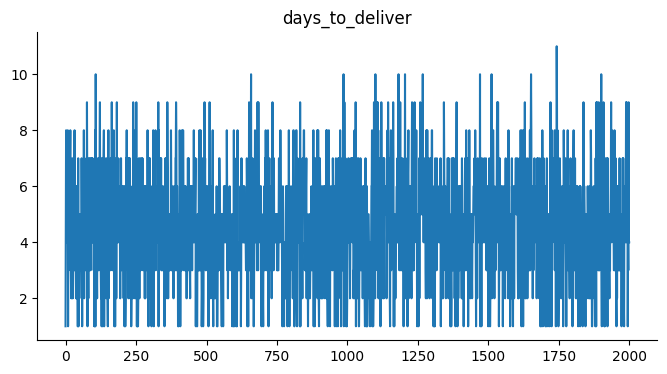

In [ ]:
# @title days_to_deliver

from matplotlib import pyplot as plt
df['days_to_deliver'].plot(kind='line', figsize=(8, 4), title='days_to_deliver')
plt.gca().spines[['top', 'right']].set_visible(False)

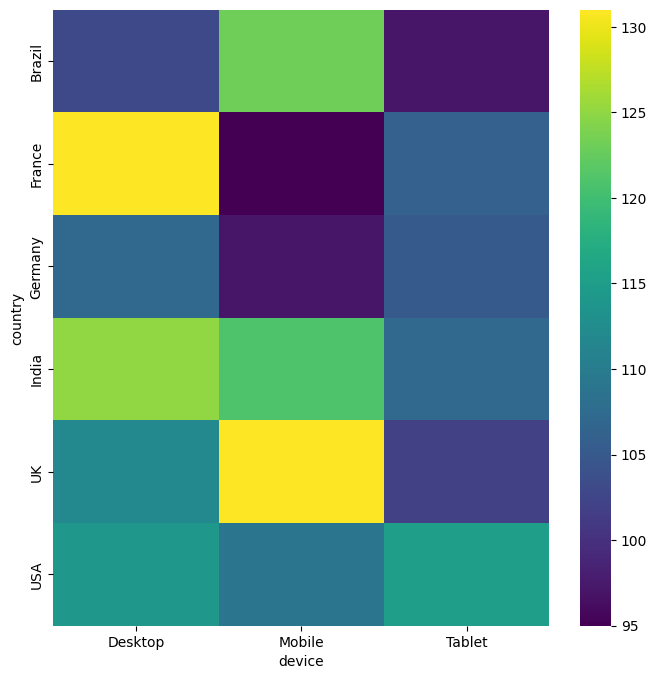

In [ ]:
# @title device vs country

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['country'].value_counts()
    for x_label, grp in df.groupby('device')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('device')
_ = plt.ylabel('country')

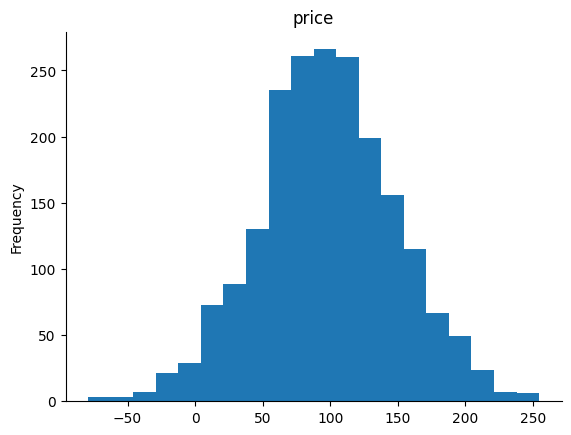

In [ ]:
# @title price

from matplotlib import pyplot as plt
df['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             2000 non-null   object        
 1   order_id            2000 non-null   object        
 2   device              2000 non-null   object        
 3   country             2000 non-null   object        
 4   gender              2000 non-null   object        
 5   price               2000 non-null   float64       
 6   discount            2000 non-null   float64       
 7   transaction_status  2000 non-null   object        
 8   delivery_status     2000 non-null   object        
 9   payment_method      2000 non-null   object        
 10  days_to_deliver     2000 non-null   int64         
 11  category            2000 non-null   object        
 12  order_date          2000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), obje

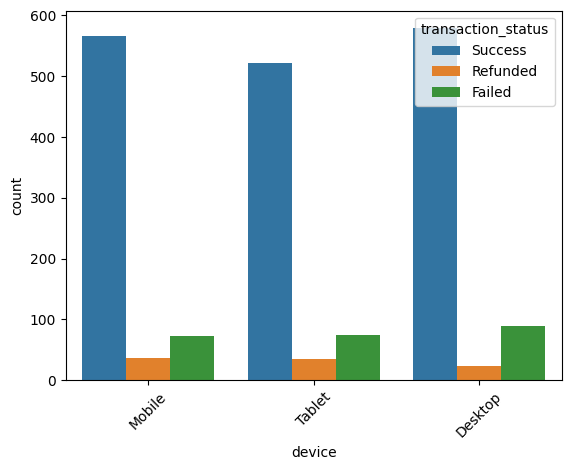

In [ ]:
# Basic data overview
df.info()
df.describe()
df['transaction_status'].value_counts()
sns.countplot(data=df, x='device', hue='transaction_status')
plt.xticks(rotation=45)
plt.show()

## 2. Data Preparation

In [ ]:
def delivery_date_calculate(row):
  return row['order_date'] + timedelta(row['days_to_deliver'])

df['delivery_date'] =  df.apply(delivery_date_calculate, axis=1)
df['delivery_date'] =  df.apply(lambda x: x**2, axis=1)
df['delivery_date']

,delivery_date
0,2024-02-19
1,2023-10-15
2,2025-01-26
3,2024-04-06
4,2023-11-05
...,...
1995,2023-03-17
1996,2023-07-19
1997,2023-07-01
1998,2023-10-14


In [ ]:
df.select_dtypes(include='object').columns

Index(['user_id', 'order_id', 'device', 'country', 'gender',
       'transaction_status', 'delivery_status', 'payment_method', 'category'],
      dtype='object')

In [ ]:
# Feature Engineering
df['discount_rate'] = df['discount'] / df['price']


# Convert categorical features
# List of columns to exclude from encoding
exclude_cols = ['user_id', 'order_id', 'order_date']

# Identify categorical columns to encode (excluding IDs and dates)
categorical_cols = df.select_dtypes(include='object').columns
categorical_to_encode = [col for col in categorical_cols if col not in exclude_cols]

# Apply get_dummies to selected columns
df_encoded = pd.get_dummies(df, columns=categorical_to_encode, drop_first=True)

# Fill missing if any
df.fillna(0, inplace=True)

In [ ]:
df_encoded

,user_id,order_id,price,discount,days_to_deliver,order_date,discount_rate,device_Mobile,device_Tablet,country_France,...,transaction_status_Success,delivery_status_Delivered,delivery_status_In Transit,payment_method_Credit Card,payment_method_Google Pay,payment_method_PayPal,category_Books,category_Electronics,category_Fashion,category_Home
0,user_1102,order_1,172.90,3.30,1,2024-08-15,0.019086,True,False,False,...,True,True,False,False,False,False,False,False,True,False
1,user_1435,order_2,25.19,8.92,4,2024-05-29,0.354109,False,True,True,...,True,True,False,False,False,False,False,False,True,False
2,user_1860,order_3,103.85,26.20,8,2023-11-19,0.252287,False,True,False,...,True,False,True,False,True,False,False,False,False,False
3,user_1270,order_4,106.20,14.48,6,2023-05-01,0.136347,True,False,False,...,True,True,False,True,False,False,False,False,True,False
4,user_1106,order_5,36.28,13.01,4,2023-04-19,0.358600,False,True,True,...,True,True,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,user_1826,order_1996,105.88,6.51,4,2024-04-15,0.061485,False,False,False,...,True,False,False,False,False,True,True,False,False,False
1996,user_1726,order_1997,186.72,7.99,3,2024-09-02,0.042791,False,True,False,...,True,True,False,False,False,True,False,False,False,True
1997,user_1476,order_1998,51.24,4.68,9,2024-02-13,0.091335,False,True,False,...,True,True,False,True,False,False,False,True,False,False
1998,user_1593,order_1999,210.42,11.48,4,2023-11-17,0.054558,False,False,True,...,True,False,False,True,False,False,False,False,True,False


In [ ]:
!pip install pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26773 sha256=94e5512ee9f18a27522a161522a9a4bdf3dd2f9a7c7b3cafd435d85e35339675
  Stored in directory: /root/.cache/pip/wheels/68/5d/a5/edc271b998f909801d7956959f699b976cc9896075dc47c153
Successfully built pandasql


In [ ]:
import pandas as pd
import pandasql as ps
import plotly.express as px
import plotly.graph_objects as go
import re
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [ ]:
# Loading user sessions data

sheet_id = "1F8mYo8lBgnCWpEigNWsrnd8MentfMUEiD0qPYQZ20C0"
sheet_name = "user_sessions"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
users_sessions_data = pd.read_csv(url)

In [ ]:
users_sessions_data

,user_id,device,age,budget_group,first_session_length,group
0,user_1,iOS,18-30,moderate,2.75,control
1,user_2,iOS,60+,low,18.16,control
2,user_3,Desktop,46-60,high,10.59,control
3,user_4,Desktop,31-45,low,7.76,control
4,user_5,Desktop,60+,moderate,10.16,test
...,...,...,...,...,...,...
1995,user_1996,iOS,60+,moderate,3.82,test
1996,user_1997,Android,46-60,high,14.20,control
1997,user_1998,Desktop,46-60,low,9.00,test
1998,user_1999,Android,18-30,moderate,7.97,control


/tmp/ipython-input-73-3882172269.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(users_sessions_data, x='first_session_length', y='budget_group', inner='box', palette='Dark2')


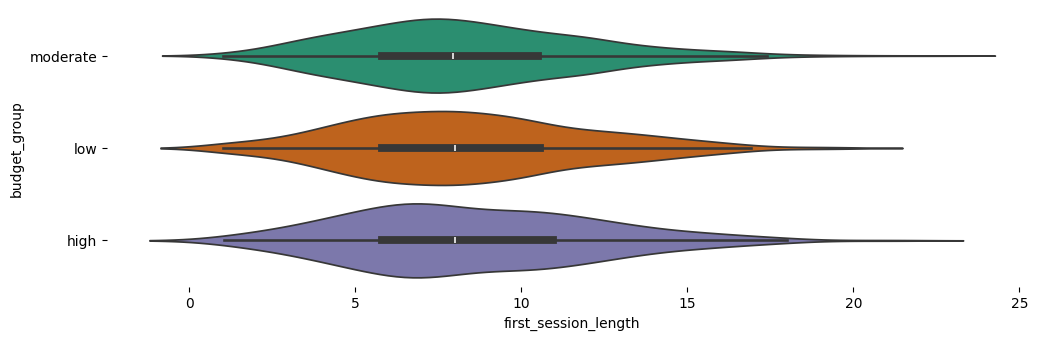

In [ ]:
# @title budget_group vs first_session_length

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(users_sessions_data['budget_group'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(users_sessions_data, x='first_session_length', y='budget_group', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)ka



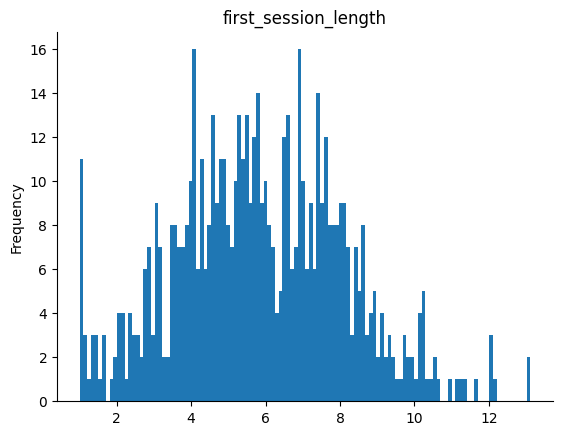

In [ ]:
# @title first_session_length

from matplotlib import pyplot as plt
users_sessions_data[users_sessions_data["age"] == "18-30"]['first_session_length'].plot(kind='hist', bins=120, title='first_session_length')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Create dummy variables for all categorical columns
categorical_columns = ["device", "age", "budget_group", "group"]
df_dummies = pd.get_dummies(users_sessions_data, columns=categorical_columns, drop_first=False)

# View the first few rows
print(df_dummies.head())

  user_id  first_session_length  device_Android  device_Desktop  device_iOS  \
0  user_1                  2.75           False           False        True   
1  user_2                 18.16           False           False        True   
2  user_3                 10.59           False            True       False   
3  user_4                  7.76           False            True       False   
4  user_5                 10.16           False            True       False   

   age_18-30  age_31-45  age_46-60  age_60+  budget_group_high  \
0       True      False      False    False              False   
1      False      False      False     True              False   
2      False      False       True    False               True   
3      False       True      False    False              False   
4      False      False      False     True              False   

   budget_group_low  budget_group_moderate  group_control  group_test  
0             False                   True           Tru

In [ ]:
df_dummies

,user_id,first_session_length,device_Android,device_Desktop,device_iOS,age_18-30,age_31-45,age_46-60,age_60+,budget_group_high,budget_group_low,budget_group_moderate,group_control,group_test
0,user_1,2.75,False,False,True,True,False,False,False,False,False,True,True,False
1,user_2,18.16,False,False,True,False,False,False,True,False,True,False,True,False
2,user_3,10.59,False,True,False,False,False,True,False,True,False,False,True,False
3,user_4,7.76,False,True,False,False,True,False,False,False,True,False,True,False
4,user_5,10.16,False,True,False,False,False,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,user_1996,3.82,False,False,True,False,False,False,True,False,False,True,False,True
1996,user_1997,14.20,True,False,False,False,False,True,False,True,False,False,True,False
1997,user_1998,9.00,False,True,False,False,False,True,False,False,True,False,False,True
1998,user_1999,7.97,True,False,False,True,False,False,False,False,False,True,True,False


## 3. Data analysis

In [ ]:
df_dummies["age_60"] = df_dummies["age_60+"]
df_dummies["age_46_60"] = df_dummies["age_46-60"]
df_dummies["age_31_45"] = df_dummies["age_31-45"]

In [ ]:
import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf


dat = df_dummies
results = smf.ols('first_session_length ~ age_60 + age_46_60 + age_31_45 + group_test', data=df_dummies).fit()

# Inspect the results
print(results.summary())


                             OLS Regression Results                             
Dep. Variable:     first_session_length   R-squared:                       0.450
Model:                              OLS   Adj. R-squared:                  0.449
Method:                   Least Squares   F-statistic:                     407.5
Date:                  Sat, 05 Jul 2025   Prob (F-statistic):          8.76e-257
Time:                          09:58:17   Log-Likelihood:                -4779.1
No. Observations:                  2000   AIC:                             9568.
Df Residuals:                      1995   BIC:                             9596.
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept       

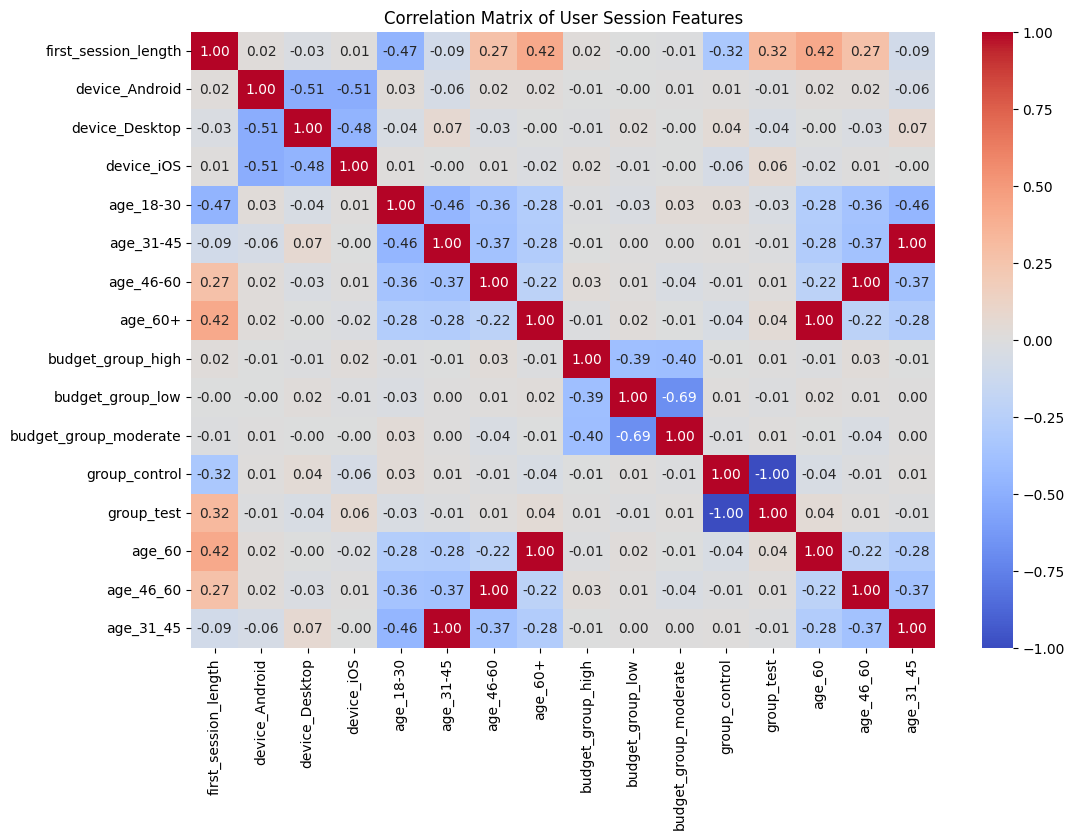

In [ ]:
# Drop user_id (non-numeric identifier)
df_encoded = df_dummies.drop(columns=['user_id'])

# Compute correlation matrix
corr_matrix = df_encoded.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix of User Session Features")
plt.show()

## Shap values
We can also try to explain relationships between features using [Shapley values.](https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html)

In [ ]:
!pip install shap

In [ ]:
df_encoded

,first_session_length,device_Android,device_Desktop,device_iOS,age_18-30,age_31-45,age_46-60,age_60+,budget_group_high,budget_group_low,budget_group_moderate,group_control,group_test,age_60,age_46_60,age_31_45
0,2.75,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False
1,18.16,False,False,True,False,False,False,True,False,True,False,True,False,True,False,False
2,10.59,False,True,False,False,False,True,False,True,False,False,True,False,False,True,False
3,7.76,False,True,False,False,True,False,False,False,True,False,True,False,False,False,True
4,10.16,False,True,False,False,False,False,True,False,False,True,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,3.82,False,False,True,False,False,False,True,False,False,True,False,True,True,False,False
1996,14.20,True,False,False,False,False,True,False,True,False,False,True,False,False,True,False
1997,9.00,False,True,False,False,False,True,False,False,True,False,False,True,False,True,False
1998,7.97,True,False,False,True,False,False,False,False,False,True,True,False,False,False,False


In [ ]:
# Define features (X) and target (y)
X = df_dummies.drop(columns=['user_id', 'first_session_length'])
y = df_encoded['first_session_length']

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
import shap

# Use TreeExplainer for tree-based models
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

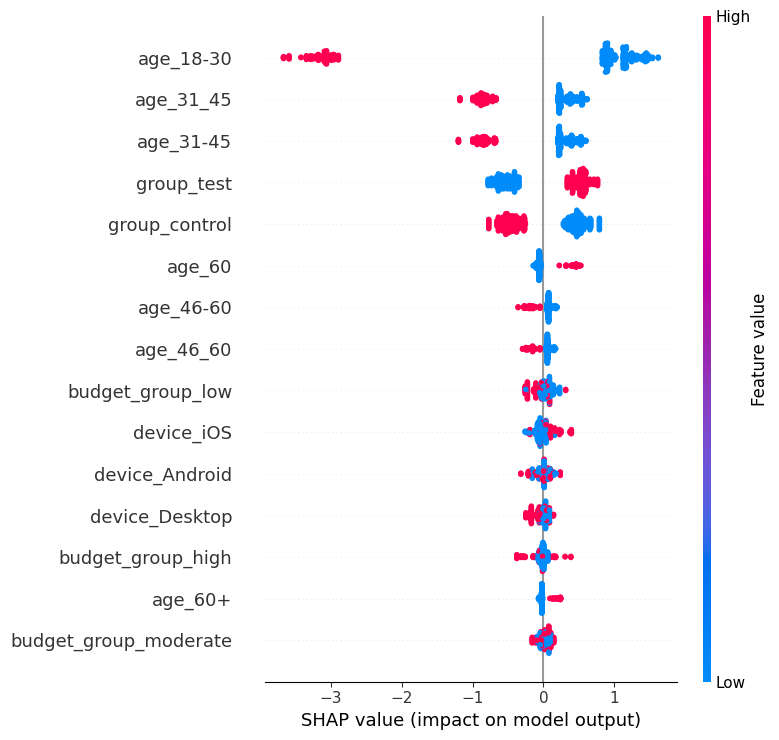

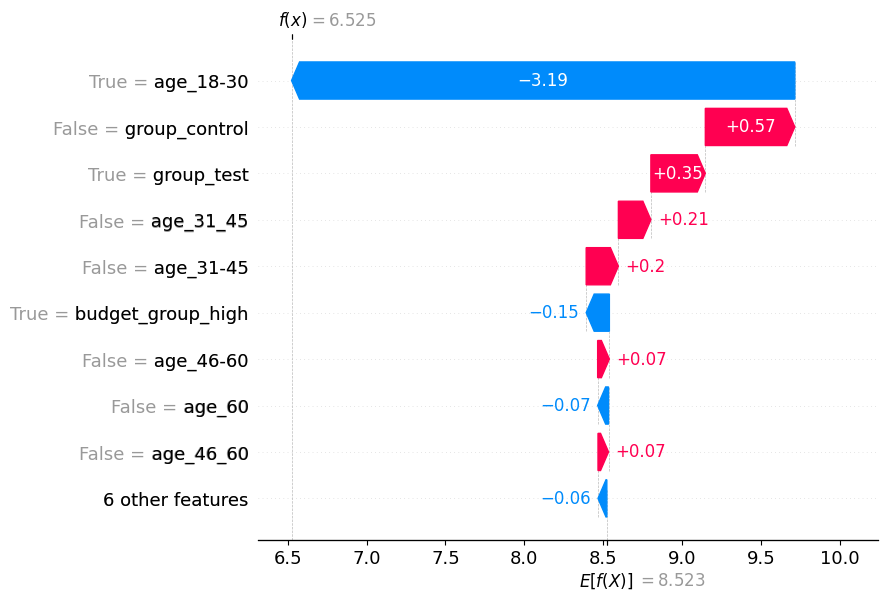

In [ ]:
# Summary plot
shap.summary_plot(shap_values, X_test)

# Force plot for a single prediction
shap.plots.waterfall(shap_values[0])

# Visualisation

There's a lot of automised visualisations available in colab - but furthermore, there's galleries with more complex visualisations for all kinds of data
https://python-graph-gallery.com/


In [ ]:
df

,user_id,order_id,device,country,gender,price,discount,transaction_status,delivery_status,payment_method,days_to_deliver,category,order_date,discount_rate
0,user_1102,order_1,Mobile,USA,Male,172.90,3.30,Success,Delivered,Apple Pay,1,Fashion,2024-08-15,0.019086
1,user_1435,order_2,Tablet,France,Other,25.19,8.92,Success,Delivered,Apple Pay,4,Fashion,2024-05-29,0.354109
2,user_1860,order_3,Tablet,Brazil,Female,103.85,26.20,Success,In Transit,Google Pay,8,Beauty,2023-11-19,0.252287
3,user_1270,order_4,Mobile,UK,Male,106.20,14.48,Success,Delivered,Credit Card,6,Fashion,2023-05-01,0.136347
4,user_1106,order_5,Tablet,France,Female,36.28,13.01,Success,Delivered,Google Pay,4,Home,2023-04-19,0.358600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,user_1826,order_1996,Desktop,India,Male,105.88,6.51,Success,Cancelled,PayPal,4,Books,2024-04-15,0.061485
1996,user_1726,order_1997,Tablet,Brazil,Other,186.72,7.99,Success,Delivered,PayPal,3,Home,2024-09-02,0.042791
1997,user_1476,order_1998,Tablet,Brazil,Female,51.24,4.68,Success,Delivered,Credit Card,9,Electronics,2024-02-13,0.091335
1998,user_1593,order_1999,Desktop,France,Male,210.42,11.48,Success,Cancelled,Credit Card,4,Fashion,2023-11-17,0.054558


# Data aggegation

## Basic aggregation

In [ ]:
# Average session length per device

users_sessions_data.groupby("device")["first_session_length"].mean()

,first_session_length
device,
Android,8.447052
Desktop,8.207496
iOS,8.423199


In [ ]:
# Count of users per age group

users_sessions_data["age"].value_counts()
# or
users_sessions_data.groupby("age")["user_id"].count()

,user_id
age,
18-30,616
31-45,637
46-60,452
60+,295


In [ ]:
# Median session length by budget group

users_sessions_data.groupby("budget_group")["first_session_length"].median()

,first_session_length
budget_group,
high,8.01
low,8.00
moderate,7.95


In [ ]:
# Mean and Std Dev of session length by age group

users_sessions_data.groupby("age")["first_session_length"].agg(["mean", "std"])

,mean,std
age,,
18-30,5.848425,2.286833
31-45,7.883532,2.761086
46-60,10.127235,3.146536
60+,11.938305,3.484305


In [ ]:
# Aggregating multiple columns

users_sessions_data.groupby("group").agg({
    "first_session_length": ["mean", "max", "min"],
    "user_id": "count"
})

first_session_length             user_id
                        mean    max  min   count
group                                           
control             7.180795  20.69  1.0     968
test                9.469709  22.44  1.0    1032

## Multiple level aggregation

In [ ]:
# Average session length by age and device

users_sessions_data.groupby(["age", "device"])["first_session_length"].mean().unstack()

device,Android,Desktop,iOS
age,,,
18-30,5.824156,5.649231,6.054631
31-45,7.982273,7.806596,7.876324
46-60,10.395740,9.865704,10.059189
60+,11.767658,11.743895,12.358652


In [ ]:
# Median session length by group and budget group

users_sessions_data.groupby(["group", "budget_group"])["first_session_length"].median().unstack()

budget_group,high,low,moderate
group,,,
control,6.925,6.705,6.74
test,9.270,9.170,9.09


In [ ]:
# Pivot of mean session length by device and group

users_sessions_data.pivot_table(
    values="first_session_length",
    index="device",
    columns="group",
    aggfunc="mean"
)

group,control,test
device,,
Android,7.237307,9.619833
Desktop,7.104024,9.377739
iOS,7.201224,9.399413


In [ ]:
# Rename multiple metrics in a clean output

users_sessions_data.groupby("device").agg(
    avg_session=("first_session_length", "mean"),
    max_session=("first_session_length", "max"),
    user_count=("user_id", "nunique")
)

,avg_session,max_session,user_count
device,,,
Android,8.447052,20.69,709
Desktop,8.207496,21.05,647
iOS,8.423199,22.44,644


## Conditional Aggregation

In [ ]:
# Mean session length for test group only

users_sessions_data[users_sessions_data["group"] == "test"].groupby("age")["first_session_length"].mean()

,first_session_length
age,
18-30,6.883046
31-45,9.016862
46-60,11.100253
60+,12.695357


In [ ]:
# Mean session length for users in high budget and age group 60+

users_sessions_data[
    (users_sessions_data["budget_group"] == "high") &
    (users_sessions_data["age"] == "60+")
]["first_session_length"].mean()

np.float64(12.506274509803923)